In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [3]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT c.name, tr.bank_name, SUM(f.total_price) " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.coustomer_dim c on c.coustomer_key=f.coustomer_key " \
              " JOIN ecomdb_star_schema.trans_dim tr on tr.payment_key=f.payment_key "\
              " GROUP BY CUBE (c.name,tr.bank_name) "\
              " ORDER BY tr.bank_name"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('anuradha @ anu', 'AB Bank Limited', Decimal('236.0')),
 ('bharti pasi', 'AB Bank Limited', Decimal('237.0')),
 ('bharti singh @ sona', 'AB Bank Limited', Decimal('635.5')),
 ('ankita kanwar rathore', 'AB Bank Limited', Decimal('200.0')),
 ('bina bai', 'AB Bank Limited', Decimal('670.0')),
 ('divya sharma d/o om prakash sharma', 'AB Bank Limited', Decimal('32.0')),
 ('aktri aapa', 'AB Bank Limited', Decimal('222.5')),
 ('durga pathik', 'AB Bank Limited', Decimal('148.0')),
 ('bhatari', 'AB Bank Limited', Decimal('407.5')),
 ('aishwarya', 'AB Bank Limited', Decimal('253.75')),
 ('akshay kumar', 'AB Bank Limited', Decimal('498.5')),
 ('bhateri @ bhawna', 'AB Bank Limited', Decimal('96.0')),
 ('gurmel kour', 'AB Bank Limited', Decimal('119.0')),
 ('bina', 'AB Bank Limited', Decimal('49.0')),
 ('durga kumari', 'AB Bank Limited', Decimal('823.0')),
 ('bhatri', 'AB Bank Limited', Decimal('74.0')),
 ('gytri  garg', 'AB Bank Limited', Decimal('256.0')),
 ('bimlesh', 'AB Bank Limited', Decima

In [4]:
df = pd.DataFrame(list(records), columns=['Coustomer_name','Bank_name', 'total_price'])
df.head(10)

,Coustomer_name,Bank_name,total_price
0,anuradha @ anu,AB Bank Limited,236.0
1,bharti pasi,AB Bank Limited,237.0
2,bharti singh @ sona,AB Bank Limited,635.5
3,ankita kanwar rathore,AB Bank Limited,200.0
4,bina bai,AB Bank Limited,670.0
5,divya sharma d/o om prakash sharma,AB Bank Limited,32.0
6,aktri aapa,AB Bank Limited,222.5
7,durga pathik,AB Bank Limited,148.0
8,bhatari,AB Bank Limited,407.5
9,aishwarya,AB Bank Limited,253.75


In [5]:
df.columns[df.isna().any()]

Index(['Coustomer_name', 'Bank_name'], dtype='object')

In [6]:
df.Coustomer_name = df.Coustomer_name.fillna('')
df.columns[df.isna().any()]

Index(['Bank_name'], dtype='object')

In [7]:
df.Bank_name = df.Bank_name.fillna('')
df.columns[df.isna().any()]

Index([], dtype='object')

In [8]:
df.dtypes

Coustomer_name    object
Bank_name         object
total_price       object
dtype: object

In [9]:
df['total_price'] = pd.to_numeric(df['total_price'],errors='coerce')

In [11]:
df_s=df.iloc[0:4]
df_s

,Coustomer_name,Bank_name,total_price
0,anuradha @ anu,AB Bank Limited,236.0
1,bharti pasi,AB Bank Limited,237.0
2,bharti singh @ sona,AB Bank Limited,635.5
3,ankita kanwar rathore,AB Bank Limited,200.0


In [12]:
df1= df_s.set_index(['Coustomer_name'])

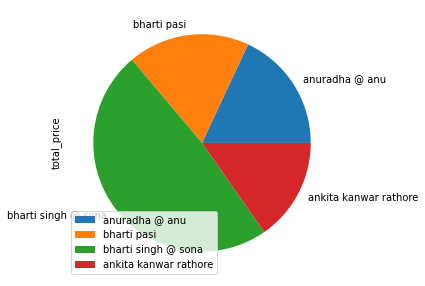

In [13]:
plot = df1.plot.pie(y='total_price', figsize=(5, 5))